#Credit Card Fraud Detection
##Codsoft Internship
###- Haree J


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
transaction_dataset= pd.read_csv("/content/creditcard.csv")
transaction_dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [3]:
transaction_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15931,27369,-1.160116,-0.244177,0.744250,-0.192350,1.156356,-1.931383,0.409670,-0.364716,-0.516156,...,-0.021714,0.012447,-0.360625,0.514926,0.064194,1.026317,-0.030845,-0.083609,52.90,0.0
15932,27369,-3.058318,3.099206,-4.932555,1.924138,-1.576032,-2.135383,-0.830098,2.228617,-0.312343,...,-0.111526,-0.485223,-0.003945,0.049422,-0.173962,-0.379260,0.171872,-0.236166,99.99,0.0
15933,27369,-0.661806,0.315385,2.011194,-0.438757,-0.554990,-0.668072,0.424651,0.079141,0.126057,...,0.148063,0.177511,0.134794,0.359931,-0.544428,0.181545,0.068546,0.153438,74.58,0.0
15934,27370,1.525348,-1.231442,0.420095,-1.551218,-1.376006,0.100758,-1.455755,0.134876,-1.319056,...,-0.108619,0.084883,-0.051758,-0.815038,0.331989,-0.015837,0.058942,0.011087,6.00,0.0
15935,27371,1.385680,-0.590076,-0.569197,-0.939441,-0.196015,-0.486685,-0.102496,-0.237930,-0.928028,...,-0.255944,-1.055682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
transaction_dataset.shape

(15936, 31)

In [6]:
transaction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

In [7]:
transaction_dataset.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [9]:
transaction_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,...,15936.000000,15936.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000
mean,12121.217871,-0.254293,0.277171,0.803852,0.301343,-0.130469,0.112551,-0.150434,0.000687,0.860838,...,-0.061754,-0.162257,-0.036524,0.011509,0.117477,0.037900,0.015402,0.006161,66.390222,0.004581
std,8982.283843,1.843083,1.491497,1.704252,1.491713,1.382485,1.329406,1.321898,1.303509,1.253988,...,0.855525,0.624614,0.543296,0.587200,0.436867,0.546881,0.401168,0.253739,189.355098,0.067531
min,0.000000,-28.344757,-40.978852,-27.368650,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.512377,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3633.500000,-0.970824,-0.286548,0.371671,-0.621215,-0.712525,-0.639011,-0.600811,-0.179179,0.067089,...,-0.268829,-0.559341,-0.173003,-0.336475,-0.140144,-0.355523,-0.073563,-0.013205,5.490000,0.000000
50%,10980.000000,-0.318478,0.247437,0.941822,0.231366,-0.186241,-0.160812,-0.084696,0.017471,0.851878,...,-0.127164,-0.126343,-0.044512,0.060331,0.155636,-0.027574,0.001209,0.017630,15.950000,0.000000
75%,20621.500000,1.161949,0.884689,1.575960,1.180124,0.352221,0.501828,0.440006,0.266216,1.567643,...,0.027233,0.229727,0.072765,0.393416,0.393032,0.359173,0.100782,0.076575,53.890000,0.000000
max,27371.000000,1.960497,14.601998,4.101716,11.927512,34.099309,21.393069,34.303177,17.052566,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [10]:
transaction_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [12]:
transaction_dataset.isnull().sum().sum()

8

In [13]:
transaction_dataset['Class'].value_counts()

0.0    15862
1.0       73
Name: Class, dtype: int64

In [14]:
legit = transaction_dataset[transaction_dataset.Class == 0]
fraud = transaction_dataset[transaction_dataset.Class == 1]

In [15]:
print("Shape of legit : ", legit.shape)
print("Shape of fraud : ", fraud.shape)

Shape of legit :  (15862, 31)
Shape of fraud :  (73, 31)


In [17]:
legit.Amount.describe()

count    15862.000000
mean        66.280151
std        188.898885
min          0.000000
25%          5.522500
50%         15.950000
75%         53.890000
max       7712.430000
Name: Amount, dtype: float64

In [18]:
fraud.Amount.describe()

count      73.000000
mean       90.307123
std       271.634360
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [19]:
transaction_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,12104.432165,-0.219072,0.25000,0.862854,0.272641,-0.105868,0.124522,-0.112681,-0.016178,0.879120,...,0.028173,-0.064056,-0.161585,-0.035040,0.013076,0.117023,0.037111,0.011206,0.005907,66.280151
1.0,15559.643836,-7.929807,6.19312,-11.997831,6.555050,-5.474984,-2.480356,-8.354317,3.668478,-3.086988,...,0.671905,0.441100,-0.295856,-0.358994,-0.328925,0.216076,0.209323,0.927187,0.061380,90.307123


In [20]:
ligit_sample = transaction_dataset.sample(n = 492)

In [21]:
new_transaction_dataset2 = pd.concat([ligit_sample, fraud], axis = 0)

In [22]:
new_transaction_dataset2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6525,7860,0.979571,-0.198121,1.348483,1.773166,-0.434870,1.429838,-0.821074,0.507954,2.326959,...,-0.485026,-0.709022,0.111463,-0.362798,0.282055,-0.535232,0.073635,0.009288,18.71,0.0
7006,9173,-1.674761,-0.059654,2.421553,-2.473769,-0.318556,-0.621208,-0.102203,0.109909,2.692338,...,0.083442,0.857635,0.005190,0.081708,0.543483,0.007788,0.441958,0.199916,52.60,0.0
2089,1610,-0.020118,0.078892,2.170487,0.868772,-1.227776,-0.141584,-0.448288,0.102801,-0.812826,...,-0.215843,0.067478,0.242842,0.684503,-1.206983,-0.459941,0.325670,0.251058,21.50,0.0
4781,4250,1.015982,0.254365,0.620039,1.494604,0.470163,1.255922,-0.226799,0.295975,1.411473,...,-0.133388,0.273829,0.083820,-0.666219,0.385798,-0.274221,0.075576,0.002012,1.00,0.0
332,242,-0.398935,0.941953,1.359288,0.013490,-0.191940,-0.824441,0.474948,0.175557,-0.362987,...,-0.222210,-0.704461,0.020807,0.429138,-0.286397,0.048579,0.229096,0.085802,2.69,0.0


In [23]:
new_transaction_dataset2.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15566,26961,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,...,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,99.99,1.0
15736,27163,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,...,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,99.99,1.0
15751,27187,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,-3.794093,...,1.777063,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,99.99,1.0
15781,27219,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99,1.0
15810,27252,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,-3.742605,...,1.784316,-1.917759,-1.235787,0.161105,1.820378,-0.219359,1.388786,0.406810,99.99,1.0


In [24]:
new_transaction_dataset2['Class'].value_counts()

0.0    489
1.0     76
Name: Class, dtype: int64

In [25]:
new_transaction_dataset2.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,12448.564417,-0.265519,0.246423,0.909609,0.255272,-0.000060,0.163336,-0.134155,-0.047448,0.885490,...,0.039637,-0.053332,-0.214507,0.015812,0.012903,0.125937,0.016556,0.012136,0.005725,59.338773
1.0,15298.539474,-7.623927,6.111397,-11.837241,6.564654,-5.291057,-2.478728,-8.199219,3.571533,-3.080135,...,0.678037,0.458046,-0.284488,-0.342497,-0.339150,0.192465,0.220515,0.934438,0.076809,86.781842


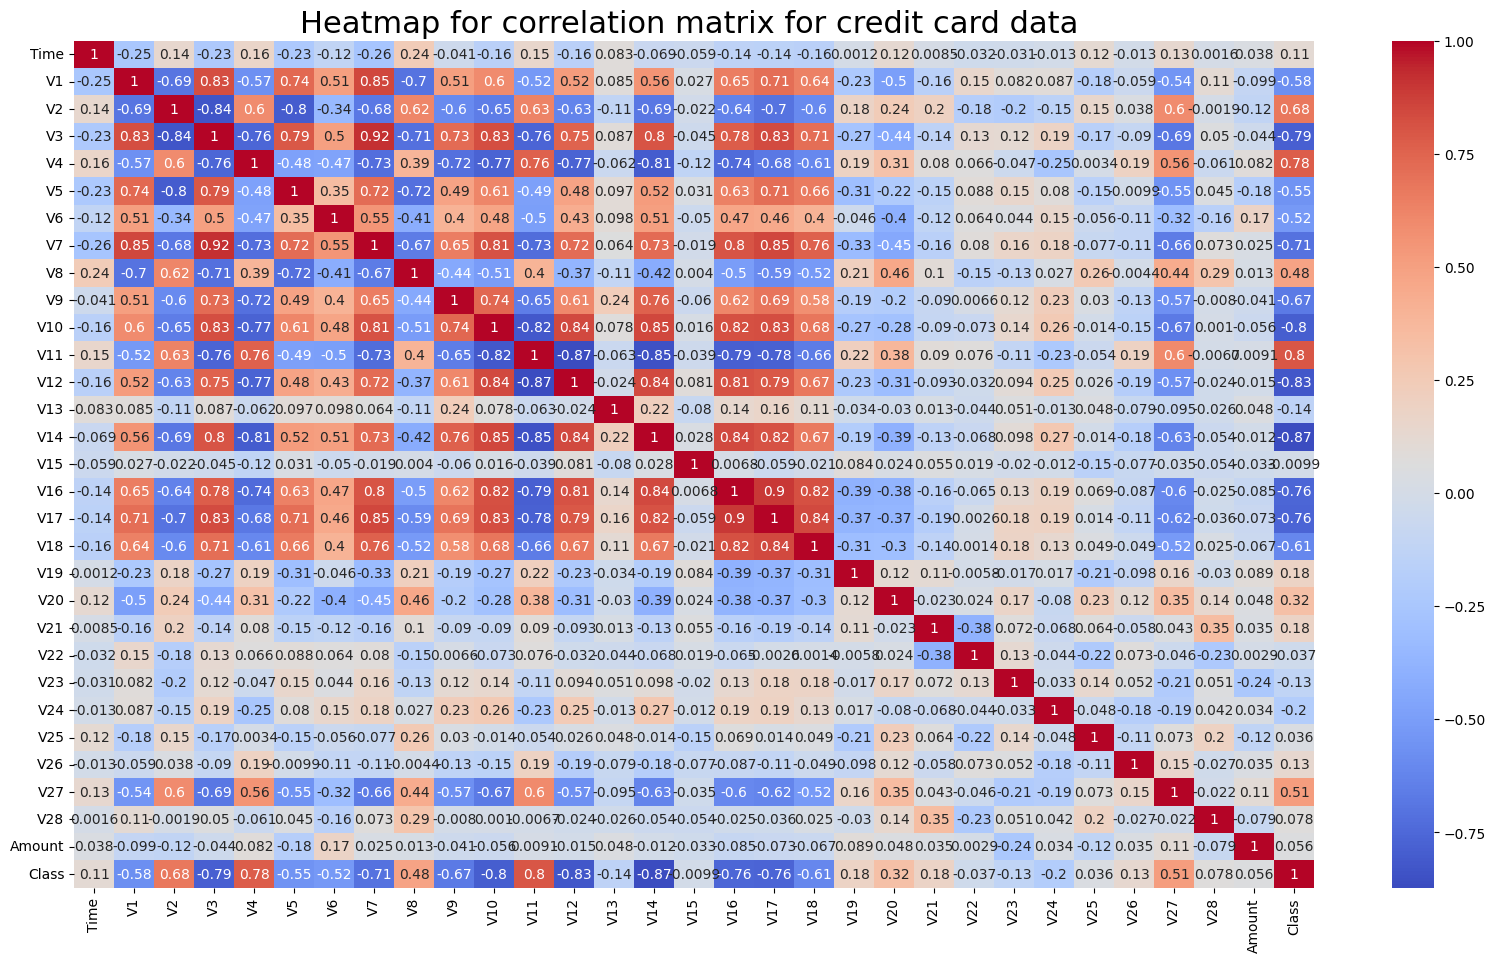

In [29]:
plt.figure(figsize = (20,11))

sns.heatmap(new_transaction_dataset2.corr(), annot = True, cmap = 'coolwarm')

plt.title("Heatmap for correlation matrix for credit card data ", fontsize = 22)
plt.show()

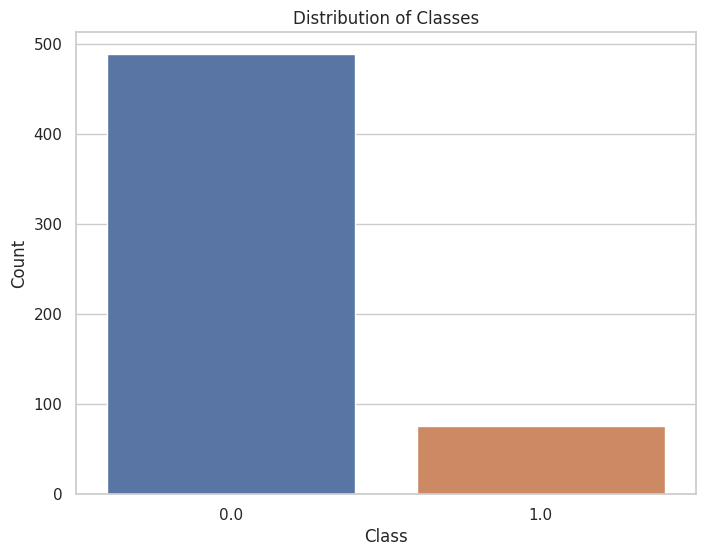

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=new_transaction_dataset2, x="Class")

plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")

plt.show()

In [31]:
X = new_transaction_dataset2.drop(columns = 'Class', axis = 1)
Y = new_transaction_dataset2['Class']

In [33]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
6525,7860,0.979571,-0.198121,1.348483,1.773166,-0.434870,1.429838,-0.821074,0.507954,2.326959,...,-0.281140,-0.485026,-0.709022,0.111463,-0.362798,0.282055,-0.535232,0.073635,0.009288,18.71
7006,9173,-1.674761,-0.059654,2.421553,-2.473769,-0.318556,-0.621208,-0.102203,0.109909,2.692338,...,0.175261,0.083442,0.857635,0.005190,0.081708,0.543483,0.007788,0.441958,0.199916,52.60
2089,1610,-0.020118,0.078892,2.170487,0.868772,-1.227776,-0.141584,-0.448288,0.102801,-0.812826,...,-0.367960,-0.215843,0.067478,0.242842,0.684503,-1.206983,-0.459941,0.325670,0.251058,21.50
4781,4250,1.015982,0.254365,0.620039,1.494604,0.470163,1.255922,-0.226799,0.295975,1.411473,...,-0.310061,-0.133388,0.273829,0.083820,-0.666219,0.385798,-0.274221,0.075576,0.002012,1.00
332,242,-0.398935,0.941953,1.359288,0.013490,-0.191940,-0.824441,0.474948,0.175557,-0.362987,...,-0.012258,-0.222210,-0.704461,0.020807,0.429138,-0.286397,0.048579,0.229096,0.085802,2.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15566,26961,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,...,1.630787,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,99.99
15736,27163,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,...,1.640037,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,99.99
15751,27187,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,-3.794093,...,1.649202,1.777063,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,99.99
15781,27219,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99


In [34]:
Y

6525     0.0
7006     0.0
2089     0.0
4781     0.0
332      0.0
        ... 
15566    1.0
15736    1.0
15751    1.0
15781    1.0
15810    1.0
Name: Class, Length: 565, dtype: float64

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [36]:
print("Shape of X_train ", X_train.shape)
print("Shape of X_test ", X_test.shape)
print("Shape of Y_train ", Y_train.shape)
print("Shape of Y_test ", Y_test.shape)

Shape of X_train  (452, 30)
Shape of X_test  (113, 30)
Shape of Y_train  (452,)
Shape of Y_test  (113,)


In [37]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
X_train_prediction = model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [39]:
print("Accuracy on Training data ",traning_data_accuracy)

Accuracy on Training data  0.9778761061946902


In [40]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [41]:
print("Accuracy on Testing data ",test_data_accuracy)

Accuracy on Testing data  0.9734513274336283
